<center>
<div style="max-width:400px;">

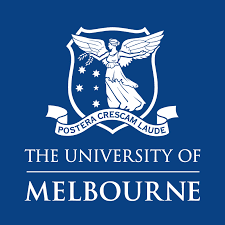

</div>
</center>

# Probability Distributions and Confidence Intervals Notebook

**Prof. Kevin Otto and Nikolas Crossan**  
The University of Melbourne  
Department of Mechanical Engineering

-------------------------------------------------------------------

Herein are notes, examples and code blocks to compute various probabilities and confidence intervals.  
1. Probability of events
2. Confidence intervals
The focus is on manufacturing assessments of quality statistics: defective proportions and the binomial distribution, defect counts and the Poisson distribution, and specification limits and the normal distribution.  

This notebook relies on the `mqrpy` code library, found at https://pypi.org/project/mqrpy/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import mqr
from mqr.plot import Figure
import mqr.nbtools as nb

from importlib.metadata import version
print('MQR version', version('mqrpy'))
print('Numpy version ', version('numpy'))
print('Scipy version ', version('scipy'))
print('Pandas version ', version('pandas'))
print('Seaborn version ', version('seaborn'))

MQR version 0.6.0
Numpy version  1.26.4
Scipy version  1.13.1
Pandas version  2.2.2
Seaborn version  0.13.2


# 1.0 Distribution Examples

This next section demonstrates probability distribution functions and their use in manufacturing quality.  The binomial distribution and its use with yield and defective scrap rate analysis, the Poisson distribution for defect analysis, and the normal distribution for continuous measurement and control types of error analysis.

The following distribution functions are demonstrated, using Scipy for statistics.


| Distribution | Typical Use            | Math             | Python                     |
|--------------|:-----------------------|:----------------:|:---------------------------|
| Binomial     | Pass/Fail Data         | $$Pr(X=x)$$      | binom.pdf$(r, N, \pi)$     |
|              |                        | $$Pr(X \leq x)$$ | binom.pmf$(r, N, \pi)$     |
|              |                        | $$Pr^{-1}(p)$$   | binom.ppf$(p, N, \pi)$     |
| Poisson      | Defect Count Data      | $$Pr(X=x)$$      | poisson.pdf$(r, N, \pi)$   |
|              |                        | $$Pr(X \leq x)$$ | poisson.pmf$(r, N, \pi)$   |
|              |                        | $$Pr^{-1}(p)$$   | poisson.ppf$(p, N, \pi)$   |
| Normal       | Measurement error data | $$\phi(x)$$      | norm.pdf$(x, \mu, \sigma)$ |
|              |                        | $$\Phi(x)$$      | norm.cdf$(x, \mu, \sigma)$ |
|              |                        | $$\Phi^{-1}(p)$$ | norm.ppf$(x, \mu, \sigma)$ |


## 1.1 Binominal Distribution

We start with the binomial distribution, which deals with the probabilities of accumulated chances of a binary outcome probability.  If we have multiple units built, and each has a chance at being made properly or defectively, then one might ask what is the accumulated probability of failures for a set of built parts. The binomial distribution computes these probabilities.  For example, to compute the probability of seeing $r$ defectives in a sample of $n$ units, given a historical defective rate $\pi$.  

We will use the binomial distribution function, where
$$
Pr = B(r,N,\pi) = \left( _{N}^{r} \right) \pi^r (1-\pi)^{N-r}
$$
is the probability $Pr$ of $r$ defectives in a sample of $N$ units with a historical probability of failure $\pi$.  

Here suppose we consider producing 100 units today in a shift with a historical scrap rate of 0.5\%. What is the probability of no defective units in today's production?  What is the probability of 1 defective unit?  2 defetives?  3 defectives? 10 defectives?  

For our problem, this is a sample of $n=100$ units, and we need to compute the $Pr$ of $r$ defectives for $r = 1, ..., 10$ when $p=0.005$ is the estimate for the historical defective rate $\pi$. Create a list 1,...,10 and then compute the probability of each.  Then make a bar chart of these probabilities.

,Pr(r)
r,
0,6.057704e-01
1,3.044073e-01
2,7.571939e-02
3,1.242965e-02
4,1.514668e-03
5,1.461388e-04
6,1.162746e-05
7,7.846242e-07
8,4.583546e-08

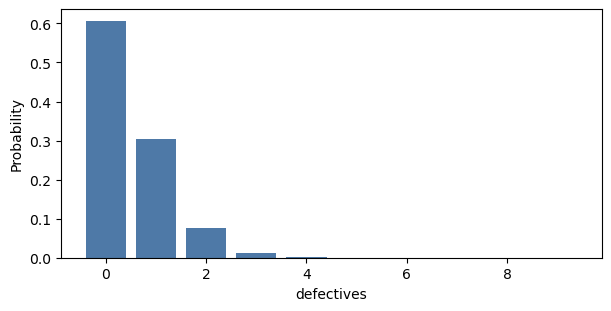

In [2]:
from scipy.stats import binom

n = 100                    # sample size
p = 0.005                  # historical probability of a fail (or pass)
r_values = list(range(10)) # define the list of r values to plot as the x-axis, values 0, 1, 2, ...

# create distribution and prob mass values
dist = binom(n, p)
pmf_values = dist.pmf(r_values)

# compute the probabilities of each value of r defectives
df = pd.DataFrame(
    {'Pr(r)': pmf_values},
    index=pd.Index(r_values, name='r'))

# display table and statistics
stats = f'''
### Stats
mean: {dist.mean():.3g}  
variance: {dist.var():.3g}
'''

# Plot the Probability values against r values
with Figure() as (fig, ax):
    ax.bar(r_values, pmf_values)
    ax.set_xlabel('defectives')
    ax.set_ylabel('Probability')
    plot = nb.grab_figure(fig)

nb.hstack(plot, df, stats)

So this shows with a historical scrap rate of 0.5\% defectives, on any give day which produces 100 units, there is only a 60\% chance of producing zero defectives, a 30\% chance of producing 1 defective, and so on.  A 0.5\% scrap rate is really not very good, despite it sounding good.  

-------------------------------------------------------------------------
## 1.2 Poisson Distribution

Next we consider the Poisson distribution.  Suppose instead of counting how many defective units are produced, we consider how many defects there are per unit, such as 2 defects per unit, or 5 defects per unit, or zero defects per unit.  This is more informative than simply whether the unit is defective or not.  This is very useful in semiconductor manufacturing and defects per area, or cable and piping systems with defects per length, etc.  

Compute the probability $Pr$ of seeing $r$ defects per line/area/part, given a historical defect rate $\lambda$.  The units are always defects-per-X, where X is a part or a length or an area or a something.   

We will use the Poisson distribution function, where
$$
Pr = P(r,\lambda) = \frac{\lambda^r e^{-r}}{r!}
$$
is the probability $Pr$ of $r$ defect rate with a historical failure rate of $\lambda$ defect rate.  


Here we consider the probability $Pr$ of seeing $r$ defect rate for $r = 0, ..., 10$ defects per unit, with a historical defect rate of $\lambda = 0.046$ defects per unit.  Create a list for $r$ from 0,...,10 and compute the probabilities, and then graph them in a bar chart.

,Pr(r)
r,
0,9.550420e-01
1,4.393193e-02
2,1.010434e-03
3,1.549333e-05
4,1.781733e-07
5,1.639194e-09
6,1.256715e-11
7,8.258416e-14
8,4.748589e-16

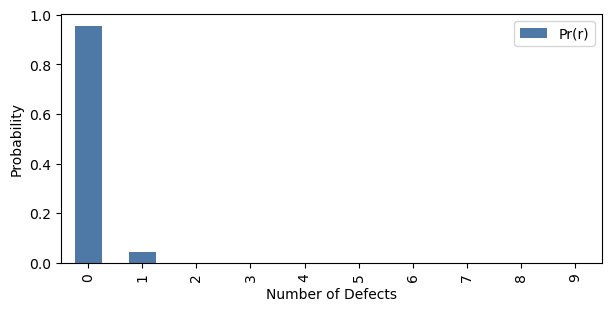

In [3]:
from scipy.stats import poisson

lam = 0.046                 # the historical defect rate 
n = 10                      # the range from 0,1,...,n of defects to compute Pr for
r_values = list(range(n))   # defining the list of r values

# obtaining the mean and variance
dist = poisson(lam)
pmf_values = dist.pmf(r_values)

# compute the probabilities of each value of r defects
df = pd.DataFrame(
    {'Pr(r)': pmf_values},
    index=pd.Index(r_values, name='r'))

# display table and statistics
stats = f'''
### Stats
mean: {dist.mean():.3g}  
variance: {dist.var():.3g}
'''

# Plot the Probability values against r values of defects
with Figure() as (fig, ax):
    df.plot.bar(ax=ax)
    ax.set_xlabel('Number of Defects')
    ax.set_ylabel('Probability')
    plot = nb.grab_figure(fig)

nb.hstack(plot, df, stats)

With a historical average defect rate of 0.046 defects per unit, there is about a 4.5% chance of one or more defects per unit, and a 4.4% chance of 1 defect per part, a 0.1% chance of 2 defects per part, etc.  

Now repeat the calculation when the historical defect rate is $\lambda = 10$ defects per unit, for up to 19 defects.  

,Pr(r)
r,
5,0.037833
6,0.063055
7,0.090079
8,0.112599
9,0.125110
10,0.125110
11,0.113736
12,0.094780
13,0.072908

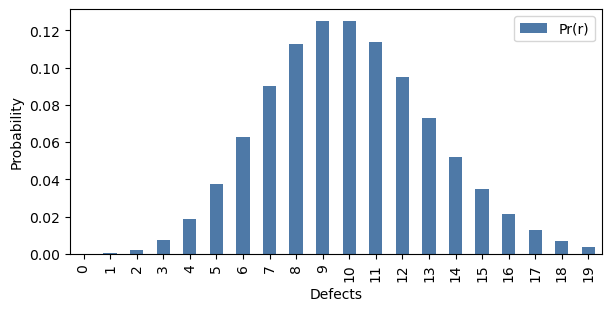

In [4]:
from scipy.stats import poisson

lam = 10                    # the historical defect rate 
n = 20                      # the range from 0,1,...,n of defects to compute Pr for
r_values = list(range(n))   # defining the list of r values

# obtaining the mean and variance 
dist = poisson(lam)
pmf_values = dist.pmf(r_values)

# compute the probabilities of each value of r defects
df = pd.DataFrame(
    {'Pr(r)': pmf_values},
    index=pd.Index(r_values, name='r'))

# display table and statistics
stats = f'''
### Stats
mean: {dist.mean():.3g}  
variance: {dist.var():.3g}
'''

# Plot the Probability values against r values of defects
with Figure() as (fig, ax):
    df.plot.bar(ax=ax)
    ax.set_xlabel('Defects')
    ax.set_ylabel('Probability')
    plot = nb.grab_figure(fig)

nb.hstack(plot, df.iloc[5:15], stats)

With a historical defect rate of 10 defects per unit, the chance of 0 defects per unit is zero, the chance of 3 or fewer defects per unit is less that 2%, etc.  The chance of more than 20 defects per unit is also again small.  

------------------------------------------------------------------------------------------------
# 2.0 Central Limit Theorem Example

The central limit theorem is foundational to all confidence intervals and statistical inferencing.  The theorem states that the distribution of a sample of means approximates and in the limit becomes a normal distribution, irregardless of the underlying population's distribution.  If a distribution is not normal, for example uniform or triangular or exponential or whatever, if you take a sample and compute the average, and repeat, and repeat, then the distribution of theses averages is normal.  

Further, the central limit theorem says the standard deviation of the averages goes down by $\sqrt{n}$ the sample size $n$.  

To consider this, consider a uniform distribution such as from tossing dice.  The possible values are (1,2,3,4,5,6), each equally likely, a uniform distribution.  Consider tossing several dice at once, with a resulting random set of integers between 1 to 6.  Compute the average value of this toss of dice.  The expected value is 3.5 (why?).  

Now lets run an experiment and simulate throwing 9 dice 100 times.  The resulting count of 1's, 2's, ..., 6's in the 100 tosses of 9 dice should be about the same in the set of 900 dice tosses.  

Next, compute the average and the standard deviation of these 900 individual throws.

Then consider computing the averages of 4 dice throws, for 100 averages of 4 dice.  Also compute the standard deviation (across the 100 sets) of these averages.  

Then consider computing the averages of 9 dice throws, for 100 averages of the 9 dice.  Also compute the standard deviation (across the 100 sets) of these averages.  

The central limit theorem says the standard deviation of these averages should go down from the standard deviation of teh individuals by $sqrt(4) = 2$ and $sqrt(9) = 3$ respectively.

To test this, compute a set of 100 rows of 9 columns of random integers from 1 to 6, here use NumPy's `randint` and save into a Pandas dataframe.  Plot these as a bar chart of die values from 1 to 6.  The distribution should be uniform.

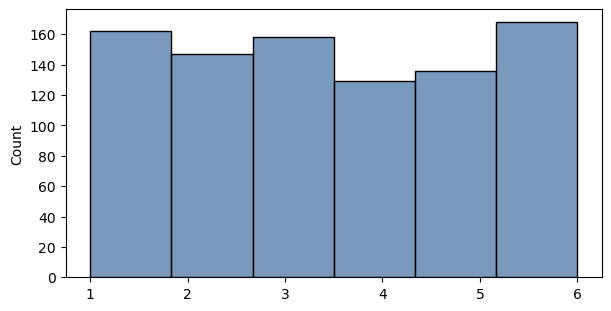

In [5]:
import seaborn as sns

# generate 9 samples of 100 random die throws, as integers from 1-6:
data = np.random.randint(1, 7, size=(100,9))
df = pd.DataFrame(data, columns=list('123456789'))

# plot them as histograms. Should be uniform.
with Figure() as (fig, ax):
    sns.histplot(df.stack(), bins=6)

So the above graph shows each value of the die was tossed about 150 times as expected.  900 total tosses with each of the 6 faces equally likely would be 900/6 = 150 occurances.  The distribution of values from 1 to 6 is a uniform distribution.

-------------------------------------------------------------------------

Now let's consider what happens to the distribution of averages.  For any toss, the expected value is $(1+2+3+4+5+6)/6 = 3.5$. The data itself is a uniform distribution at each integer value with an average of 3.5.  If we average the data across the 9 dice, we would expect each of the 100 toss averages to begin to look normal, according to the central limit theorem, and have a distribution tighter than the original uniform distribution.  So lets look at the distribution of the average of throwing 4 different dies, and the average of throwing all 9 dies.  

Average of all data: 3.482 and sigma of all data: 1.756.
Average of (average of 4 dies): 3.462 and sigma of (average of 4 dies): 0.8808.
Average of (average of 9 dies): 3.482 and sigma of (average of 9 dies): 0.6151.

Compare these average's sigmas with that determined by dividing the original data's sigma by sqrt(n):
Sigma of individual toss data: 1.756.
Sigma of individual toss data/2: 0.8778.
Sigma of individual toss data/3: 0.5852.


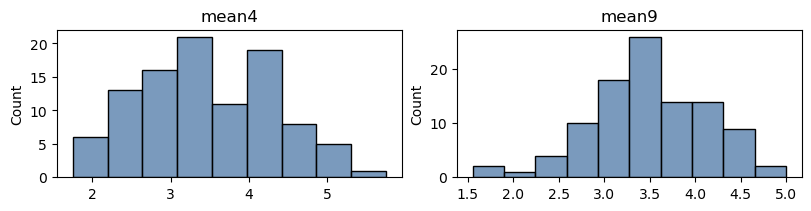

In [6]:
mean9 = df.mean(axis=1)
mean4 = df[['1','2','3','4']].mean(axis=1)

print(f'Average of all data: {df.stack().mean():.4} and sigma of all data: {df.stack().std():.4}.')
print(f'Average of (average of 4 dies): {mean4.mean():.4} and sigma of (average of 4 dies): {mean4.std():.4}.')
print(f'Average of (average of 9 dies): {mean9.mean():.4} and sigma of (average of 9 dies): {mean9.std():.4}.')

print('\nCompare these average\'s sigmas with that determined by dividing the original data\'s sigma by sqrt(n):')
print(f'Sigma of individual toss data: {df.stack().std():.4}.')
print(f'Sigma of individual toss data/2: {df.stack().std()/2.0:.4}.')
print(f'Sigma of individual toss data/3: {df.stack().std()/3.0:.4}.')

with Figure(8, 2, 1, 2) as (fig, ax):
    sns.histplot(mean4, ax=ax[0])
    ax[0].set_title('mean4')

    sns.histplot(mean9, ax=ax[1])
    ax[1].set_title('mean9')

Comparing above, the sigma's of the averages decrease by $\sqrt(n)$ the number of values in the sample being averaged.  Also, the histograms look less like the original data's uniform distribution and more and more like a normal distribution.  The central limit theorem.


---------------------------------------------------------------------------------

# 3.0 Confidence Intervals

The following confidence intervals are demonstrated.


| Confidence Interval        | Sampling Distribution | Confidence Interval | MQR-Quality Library        |
|----------------------------|:---------------------:|:-------------------:|:---------------------------|
| Mean $\mu$, $\sigma$ known | $Z$            | $$\bar{x} \pm Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$$ | mqr.inference.mean.confint_1sample |
| Mean $\mu$, $\sigma$ unknown | $t$          | $$\bar{x} \pm t_{\alpha/2,N-1}\frac{s}{\sqrt{n}}$$ | mqr.inference.mean.confint_1sample |
| Paired data difference in mean $\mu - \mu'$ | $t$ | $$\bar{d} \pm t_{\alpha/2,N-1}\frac{s_d}{\sqrt{n}}$$ | mqr.inference.mean.confint_paired |
| Difference in two mean $\mu_1 - \mu_2$ | $t$ | $$\bar{x}_1 - \bar{x}_2 \pm t_{\alpha/2,n_1+n_2-1} s_p$$ | mqr.inference.mean.confint_2sample |
| Standard Deviation $\sigma$ | $\chi^2$   | $$ s \sqrt{\frac{n-1}{\chi^2_{1-\alpha/2,n-1}}} \leq \sigma \leq s \sqrt{\frac{n-1}{\chi^2_{\alpha/2,n-1}}} $$ | mqr.inference.stddev.confint_1sample |
| Ratio of two variances $\sigma_1^2 / \sigma_2^2 $ | $F$   | $$ \frac{s_1^2}{s_2^2} F_{\alpha/2,n_1-1,n_2-1} \leq \frac{\sigma_1^2}{\sigma_2^2} \leq \frac{s_1^2}{s_2^2} F_{1-\alpha/2,n_1-1,n_2-1} $$ | mqr.inference.variance.confint_2sample |
| Proportion | $F$ | $$ \frac{2xF_{\alpha/2,v_1,v_2}}{2(n-x-1)+2xF_{\alpha/2,v_1,v_2}} \leq \pi \leq \frac{2(x+1)F_{\alpha/2,v_1,v_2}}{2(n-x)+2(x+1)F_{\alpha/2,v_1,v_2}}  $$  | mqr.inference.proportion.confint_1sample |
| Two Proportions | $Z$ | $$ p_1 - p_2 \pm Z_{\alpha/2} \sqrt{\frac{p_1(1-p_1)}{n_1}+\frac{p_2(1-p_2)}{n_2}}  $$ | mqr.inference.proportion.confint_2sample |
| Rate | $\chi^2$ | $$ r \pm \frac{1}{2nt} \chi^2_{2s,1-\alpha/2} $$  | mqr.inference.rate.confint_1sample |
| Two Rates | $Z$ | $$ r_1 - r_2 \pm Z_{\alpha/2} \sqrt{\frac{r_1}{n_1 t_1}+\frac{r_2}{n_2 t_2}} $$  | mqr.inference.rate.confint_2sample |

-----------------------------------------------------------------------------------------------------------------------

## 3.1 Confidence Interval of the Mean

This computes the confidence interval of the mean for a sample of data.

In [7]:
a = np.array([
    4.23, 3.98, 4.36, 3.86, 4.12, 4.23, 4.36, 4.44, 3.98, 4.06, 3.79,
    4.35,4.20,4.57,4.82,4.44,4.94,4.68,4.57,4.44,4.36,4.82,4.74,5.01,4.45
    ])

mqr.inference.mean.confint_1sample(a, conf=0.95, bounded='both')

ConfidenceInterval(name='mean', method='t', value=4.3919999999999995, lower=4.256409561144854, upper=4.527590438855145, conf=0.95, bounded='both')

## 3.2 Confidence Interval of the Difference of Two Paired Means

This computes the confidence interval of the difference in population means $\mu_1 - \mu_2$ from two paired samples.  

If zero is in the confidence interval, there is no significant difference in means.  Are the means significantly different in the example below?

In [8]:
Sa = np.array([
    33.59,33.13,32.84,32.01,36.75,36.41,35.61,33.12,35.26,33.45
    ])
Sb = np.array([
    34.18,33.25,32.68,31.03,40.49,39.81,38.22,33.23,37.52,33.90
    ])

mqr.inference.mean.confint_paired(Sa, Sb, conf=0.95)

ConfidenceInterval(name='difference between means (paired)', method='t', value=-1.214, lower=-2.3892684800204584, upper=-0.03873151997954172, conf=0.95, bounded='both')

## 3.3 Confidence Interval of the Difference of Two Means

This computes the confidence interval of the difference in means from two independent samples, with equal or unequal variances.  

If zero is in the confidence interval, there is no significant difference in means.

In [9]:
X1 = np.array([
    34.18,33.25,32.68,31.03,40.49,39.81,38.22,33.23,37.52,33.90
    ])
X2 = np.array([
    33.59,33.13,32.84,32.01,36.75,36.41,35.61,33.12,35.26,33.45
    ])

mqr.inference.mean.confint_2sample(X1, X2, conf=0.95, pooled=False, bounded='both')

ConfidenceInterval(name='difference between means (independent)', method='t', value=1.2139999999999986, lower=-1.2939856502498608, upper=3.721985650249858, conf=0.95, bounded='both')

## 3.4 Confidence Interval of a Standard Deviation

Computes the two sided confidence interval for a population standard deviation.

In [10]:
arr = np.array([
    4.23, 3.98, 4.36, 3.86, 4.12, 4.23, 4.36, 
    4.44, 3.98, 4.06, 3.79, 4.35,4.20,4.57,
    4.82,4.44, 4.94,4.68,4.57,4.44,4.36,4.82,
    4.74,5.01,4.45
    ])

ci = mqr.inference.stddev.confint_1sample(arr, conf=0.95, bounded='above')
display(ci)
ci.lower, ci.upper

ConfidenceInterval(name='standard deviation', method='chi2', value=0.32848135411313684, lower=0.0, upper=0.4324303339989175, conf=0.95, bounded='above')

(0.0, 0.4324303339989175)

## 3.5 Confidence Interval for the Ratio of Two Variances

Computes the confidence interval for the ratio of two population variances.

If the ratio 1 is in the confidence interval, there is no significant difference in standard deviations.

In [11]:
sample1 = np.array([
    4.23, 3.98, 4.36, 3.86, 4.12, 4.23, 4.36, 
    4.44, 3.98, 4.06, 3.79, 4.35,4.20,4.57,
    4.82,4.44, 4.94,4.68,4.57,4.44,4.36,4.82,
    4.74,5.01,4.45
    ])
sample2 = np.array([
    5.84, 5.62, 5.96, 5.51, 5.75, 5.84, 5.96, 
    6.04, 5.62, 5.69, 5.44, 5.95, 5.82, 6.16,
    6.38, 6.04, 6.49, 6.25, 6.16, 6.04, 5.96, 6.38,
    6.31, 6.56, 6.05
    ])

ci = mqr.inference.variance.confint_2sample(sample1, sample2, conf=0.95, bounded = 'both')
display(ci)
print('The confidence interval of the standard deviation is the sqrt of the variance limits:')
np.sqrt(ci.lower), np.sqrt(ci.upper)

ConfidenceInterval(name='ratio of variances', method='f', value=1.2042948345908309, lower=0.5306953215753031, upper=2.7328789036938264, conf=0.95, bounded='both')

The confidence interval of the standard deviation is the sqrt of the variance limits:


(0.7284883812218992, 1.653142130518071)

## 3.6 Confidence Interval for a Proportion

Computes the two sided confidence interval for a defective proportion.

In [12]:
count = 3      # number of defectives observed in the sample
nobs = 100     # sample size
alpha = 0.05   # significance level
method='agresti-coull'  # 'normal’, 'agresti_coull', 'beta', 'wilson', 'binom_test'

mqr.inference.proportion.confint_1sample(count, nobs, 1-alpha, method=method, bounded='both')

ConfidenceInterval(name='proportion', method='agresti-coull', value=0.03, lower=0.006522055780996003, upper=0.08825183253357054, conf=0.95, bounded='both')

## 3.7 Confidence Interval for the Difference Between Two Proportions

Computes a two sided confidence interval for the difference in population defective proportions.  

If zero is in the confidence interval, there is no significant difference in proportions.

In [13]:
count1 = 3     # number of defectives observed in sample 1
nobs1 = 200    # size of sample 1
count2 = 2     # number of defectives observed in sample 2
nobs2 = 300    # size of sample 2
alpha = 0.05   # significance level
method='agresti-caffo'  # 'newcomb', 'agresti-caffo', 'score', 'wald'

mqr.inference.proportion.confint_2sample(count1, nobs1, count2, nobs2, 1-alpha, method='agresti-caffo', bounded='both')

ConfidenceInterval(name='difference between proportions', method='agresti-caffo', value=0.008333333333333331, lower=-0.012362915776218652, upper=0.03209932650338408, conf=0.95, bounded='both')

## 3.8 Confidence Interval for a Rate

Computes a two sided confidence interval for the population defect rate.  

In [14]:
count = 13   # the sum of the number of defects found across all observations
t = 1        # the length, area, or unit count
nobs = 100   # number of units with a length, area, or unit count
alpha = 0.05 # significance level

mqr.inference.rate.confint_1sample(count, nobs, meas=t, conf=1-alpha)

ConfidenceInterval(name='rate of events', method='wald-cc', value=0.13, lower=0.05570480878251611, upper=0.20701367514532965, conf=0.95, bounded='both')

## 3.9 Confidence Interval for the Difference in Rates

Computes a two sided confidence interval for the difference in population defect rates.  

If zero is in the confidence interval, there is no significant difference in defect rates.

In [15]:
count1 = 13    # the sum of the number of defects observed across all units in sample
t1 = 1         # the length/area per unit in the sample
nobs1 = 100    # the number of units in the sample
count2 = 20    # the sum of the number of defects observed across all units in sample
t2 = 1         # the length/area per unit in the sample
nobs2 = 100    # the number of units in the sample
alpha = 0.05   # Significance level

mqr.inference.rate.confint_2sample(
    count1, nobs1,
    count2, nobs2,
    meas1=t1, meas2=t2,
    conf=1-alpha)

ConfidenceInterval(name='difference between rates of events', method='wald', value=-0.07, lower=-0.18259135894148634, upper=0.04259135894148633, conf=0.95, bounded='both')